#如何选择模型
#如何调整最佳模型参数
#如何评估模型

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

**1.train/test split**
#将数据集按test_size比例拆分为两部分，一部分用于训练，一部分用于测试

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [28]:
#用逻辑回归
from sklearn.linear_model import LogisticRegression
logre=LogisticRegression()
logre.fit(X_train,y_train)
y_pred=logre.predict(X_test)

from sklearn import metrics
#用y_pred和y_test来评估模型
metrics.accuracy_score(y_test,y_pred)

0.94999999999999996

In [29]:
#用KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

from sklearn import metrics
#用y_pred和y_test来评估模型
metrics.accuracy_score(y_test,y_pred)

0.96666666666666667

knn的k为几时模型最优

Text(0,0.5,'accuracy')

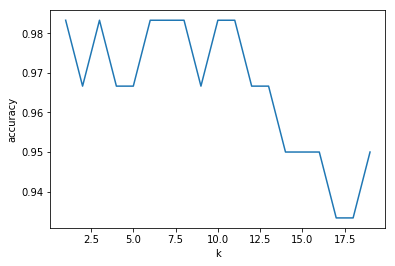

In [31]:
k_range=list(range(1,20))
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    scores.append(score)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel('k')
plt.ylabel('accuracy')

**2.交叉验证**

In [36]:
from sklearn.model_selection import cross_val_score

In [39]:
#评估逻辑回归模型
cross_val_score(logre,X,y,cv=10,scoring='accuracy').mean()

0.95333333333333337

In [40]:
#评估KNN模型
cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()

0.97333333333333338

knn的k为几时模型最优

Text(0,0.5,'accuracy')

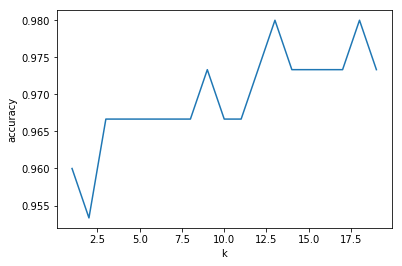

In [38]:
k_range=list(range(1,20))
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    scores.append(score.mean())

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel('k')
plt.ylabel('accuracy')

**回归问题模型评估方法**
#MAE（mean absolute errors）平均绝对误差
#MSE（mean standard errors）均方误差 会给距离较远的点一个很大的惩罚值
#RMSE（root mean standard errors）均方根误差

In [35]:
# from sklearn import metrics
# metrics.mean_absolute_error()
# metrics.mean_squared_error()
# np.sqrt(metrics.mean_squared_error())